# Lesson 04
# Peter Lorenz

## 0. Preliminaries
Import the required libraries:

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import linear_model
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mutual_info_score

import matplotlib as mpl
import matplotlib.pyplot as plt

Set some global options:

In [19]:
# Display plots inline
%matplotlib inline

# Display multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Suppress scientific notation
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Declare constants:

In [71]:
# Number of bins for computing mutual information score
MI_BINS = 20

Declare utility functions:

In [88]:
# Compute mutual information score between given column and the target variable
def calc_MI(df, target_arr, col):
    c_xy = np.histogram2d(df[col], target_arr, MI_BINS)[0]
    mi = mutual_info_score(None, None, contingency = c_xy)
    
    # Return tuple of column name and MI score vs. target
    return (col, round(mi, 3))

## 1. Read data
We begin by importing our data set:

In [65]:
# Internet location of the data set
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

# Download the data into a dataframe object
crime_data = pd.read_csv(url)

# Add columns
crime_data.columns = ['state', 'county', 'community', 'communityname', 'fold', 'population', 
                      'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 
                      'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 
                      'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 
                      'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 
                      'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 
                      'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 
                      'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 
                      'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 
                      'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 
                      'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 
                      'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
                      'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 
                      'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 
                      'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 
                      'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 
                      'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 
                      'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 
                      'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 
                      'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 
                      'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 
                      'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 
                      'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 
                      'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
                      'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
                      'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
                      'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
                      'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 
                      'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
                      'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

# Display shape
crime_data.shape

# Display initial rows, all columns vertically
with pd.option_context('display.max_rows', None, 'display.max_columns', 128):
    crime_data.head().T

(1993, 128)

,0,1,2,3,4
state,53,24,34,42,6
county,?,?,5,95,?
community,?,?,81440,6096,?
communityname,Tukwilacity,Aberdeentown,Willingborotownship,Bethlehemtownship,SouthPasadenacity
fold,1,1,1,1,1
population,0.000,0.000,0.040,0.010,0.020
householdsize,0.160,0.420,0.770,0.550,0.280
racepctblack,0.120,0.490,1.000,0.020,0.060
racePctWhite,0.740,0.560,0.080,0.950,0.540
racePctAsian,0.450,0.170,0.120,0.090,1.000


### Data Cleaning
Next we clean the data to render it suitable for analysis. First we remove the non-numeric columns used for labeling and set them aside:

In [66]:
# Extract and reserve identifying columns

# Reserve the original data frame
crime_data_orig = crime_data

# Set aside state in an array and drop from data set
state_arr = np.array(crime_data['state'].values)
crime_data = crime_data.drop(['state'], axis=1)

# Set aside county in an array and drop from data set
county_arr = np.array(crime_data['county'].values)
crime_data = crime_data.drop(['county'], axis=1)

# Set aside community in an array and drop from data set
community_arr = np.array(crime_data['community'].values)
crime_data = crime_data.drop(['community'], axis=1)

# Set aside communityname in an array and drop from data set
communityname_arr = np.array(crime_data['communityname'].values)
crime_data = crime_data.drop(['communityname'], axis=1)

# Set aside fold in an array and drop from data set
fold_arr = np.array(crime_data['fold'].values)
crime_data = crime_data.drop(['fold'], axis=1)

Then we impute missing values in the remaining columns and cast the dataframe as float:

In [67]:
# Impute missing values using column median
crime_data = crime_data.replace('?', np.NaN)
crime_data = crime_data.apply(lambda x: x.fillna(x.median()))

# Cast columns to float64
crime_data = crime_data.astype(np.float64)

# Display abbreviated data set
crime_data.head().T

,0,1,2,3,4
population,0.000,0.000,0.040,0.010,0.020
householdsize,0.160,0.420,0.770,0.550,0.280
racepctblack,0.120,0.490,1.000,0.020,0.060
racePctWhite,0.740,0.560,0.080,0.950,0.540
racePctAsian,0.450,0.170,0.120,0.090,1.000
...,...,...,...,...,...
LemasPctPolicOnPatr,0.750,0.750,0.750,0.750,0.750
LemasGangUnitDeploy,0.500,0.500,0.500,0.500,0.500
LemasPctOfficDrugUn,0.000,0.000,0.000,0.000,0.000
PolicBudgPerPop,0.155,0.155,0.155,0.155,0.155


Observe that the missing values have now been replaced with the median for each column.

Finally, we extract and reserve the target variable *ViolentCrimesPerPop*:

In [82]:
# Set aside communityname in an array and drop from data set
target_arr = np.array(crime_data['ViolentCrimesPerPop'].values)
crime_data = crime_data.drop(['ViolentCrimesPerPop'], axis=1)

Now our data set contains only predictor variables and these variables have been cleaned of missing values. We are ready to proceed to feature selection.

## 2. Apply three techniques for feature selection
Here we apply three techniques for feature selection.

### Filter methods
Our first method for feature selection is *Filter methods*. We use the *mutual information score* to assess the correlation of each variable with the target variable *ViolentCrimesPerPop*. We compute *mutual information score* for each column target variable, then sort the scores from greatest to least as follows:

In [89]:
# For each column, apply mutual information computation then sort the results
sorted([calc_MI(crime_data, target_arr, c) for c in crime_data.columns], 
       key=lambda x: x[1],
       reverse=True)

[('PctKids2Par', 0.51),
 ('PctIlleg', 0.475),
 ('PctFam2Par', 0.443),
 ('racePctWhite', 0.413),
 ('PctYoungKids2Par', 0.405),
 ('PctTeen2Par', 0.378),
 ('PctPopUnderPov', 0.353),
 ('pctWInvInc', 0.348),
 ('PctPersDenseHous', 0.347),
 ('pctWPubAsst', 0.339),
 ('racepctblack', 0.335),
 ('FemalePctDiv', 0.335),
 ('TotalPctDiv', 0.331),
 ('PctHousNoPhone', 0.298),
 ('MalePctDivorce', 0.296),
 ('PctPersOwnOccup', 0.296),
 ('PctUnemployed', 0.27),
 ('PctHousOwnOcc', 0.255),
 ('PctHousLess3BR', 0.254),
 ('PctNotHSGrad', 0.243),
 ('PctLess9thGrade', 0.239),
 ('medFamInc', 0.233),
 ('medIncome', 0.22),
 ('NumUnderPov', 0.218),
 ('PctLargHouseFam', 0.217),
 ('PctVacantBoarded', 0.211),
 ('racePctHisp', 0.205),
 ('HousVacant', 0.202),
 ('NumIlleg', 0.2),
 ('blackPerCap', 0.188),
 ('perCapInc', 0.18),
 ('PctWOFullPlumb', 0.18),
 ('PctOccupMgmtProf', 0.174),
 ('PctHousOccup', 0.173),
 ('RacialMatchCommPol', 0.173),
 ('PctNotSpeakEnglWell', 0.166),
 ('PctLargHouseOccup', 0.166),
 ('PctPolicWhite', 0

We find the variables listed according to their shared information with the target. For example, the percentage of kids in family housing with two parents (*PctKids2Par*) is found to be the variable with the highest shared information with the target with a *mutual information score* of 0.51. The top 5 features based on mutual information score are:
1. PctKids2Par
1. PctIlleg
1. PctFam2Par
1. racePctWhite
1. PctYoungKids2Par

### Wrapper methods
Our second method for feature selection is *Wrapper methods*. We apply 2 methods: *backward selection* and *forward_selection*:

#### Backward Selection
In backward selection, we start with all features and progressively remove the least helpful features until left with a subset of features that represents the best predictors of the target variable:

In [91]:
# Perform linear regression on a successively smaller subset of features, pruning less predictive features
estimator = LinearRegression()
back_selector = RFE(estimator, 5, step = 1, verbose = True) # select 5 features, removing 1 feature at a time
back_selector = back_selector.fit(crime_data, target_arr)

Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitti

We now list the features selected by backward selection:

In [93]:
# List selected features
crime_data.columns[back_selector.support_]

Index(['numbUrban', 'MalePctDivorce', 'TotalPctDiv', 'LemasSwFTPerPop',
       'PolicPerPop'],
      dtype='object')

The top 5 features based on backward selection are:
1. numbUrban
1. MalePctDivorce
1. TotalPctDiv
1. LemasSwFTPerPop
1. PolicPerPop

Remarkably, none of the 5 features chosen by backward selection is in our list of top 5 features by mutual information. One possible explanation is that linear regression is not the best model to apply to our data set. Given these conflicting results, it is clear we require additional information to determine which features are in fact the best features for our model.

We now test the accuracy of our subset of features by running the model with the subset of features:

In [97]:
# Run the model against the select subset of features to obtain predictions
yhat_backward = back_selector.predict(crime_data)

For comparison, we train the estimator on the data set with the full set of features:

In [100]:
# Apply estimator to full set of features
estimator = estimator.fit(crime_data, target_arr)
yhat_estimator = estimator.predict(crime_data)

To compare the models, we look at the correlation matrix between the respective estimators:

In [101]:
# Display correlation matrix of our two sets of predictions and the target
np.corrcoef([yhat_backward, yhat_estimator, target_arr])

array([[1.   , 0.734, 0.614],
       [0.734, 1.   , 0.837],
       [0.614, 0.837, 1.   ]])

The model based on the full set of features (0.84 correlation with target) outperforms the model based on the limited set of 5 features (0.61 correlation with target). One reason could be that 5 features is not the optimal number of features to retain in the reduced feature set.

#### Forward Selection
In forward selection, we start with a single feature and progressively add the most helpful features until we have a subset of features that (again) represents the best predictors of the target variable. For performance reasons, we cap the number of features at 20 (which is more than enough to illustrate the tapering performance increases of the model as we add features):

In [130]:
# Number of features to use in forward selection
NUMBER_OF_FEATURES = 20

# Perform linear regression on a successively larger subset of features, adding most predictive features
estimator = LinearRegression()

# Note: scoring set to R-squared as MSE resulted in 'nan' for standard errors
stepwise_selector = SFS(estimator, 
    k_features = NUMBER_OF_FEATURES, 
    forward = True, 
    floating = False, 
    scoring = 'r2')

stepwise_selector = stepwise_selector.fit(crime_data.values, target_arr)

First we extract the top 5 features:

In [143]:
# Extract the top 5 features
best_features = list(map(int, [x for x in stepwise_selector.get_metric_dict()[5]['feature_names']]))
crime_data.columns[best_features]

Index(['racePctWhite', 'pctUrban', 'PctKids2Par', 'PctWorkMom', 'HousVacant'], dtype='object')

The top 5 features based on forward selection are:
1. racePctWhite
1. pctUrban
1. PctKids2Par
1. PctWorkMom
1. HousVacant

Note that there is no intersection with the 5 features selected using backward selection. However, two features overlap with the 5 top features according to mutual information score: *PctKids2Par* and *racePctWhite*.

Now plot model performance for each subset of features:

Text(0.5, 1.0, 'Sequential selection (w. StdErr)')

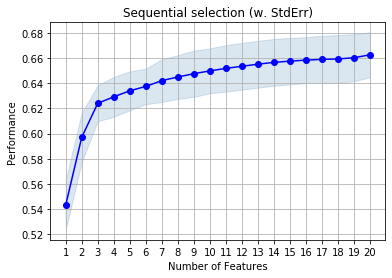

In [131]:
# Plot model performance at each increment
# WARNING: This can take a litle while!
fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err')
plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

The graph shows that performance increases sharply with the 3 top features in the model, then the performance increases become more gradual.

### Embedded methods
Our third method for feature selection is *Embedded methods*. We apply 2 methods: *LASSO* and *ridge regression*. Both are implementations of linear regression that attempt to minimize prediction error and a penalty based on the model's parameters and a *shrinkage constant* (alpha).

#### LASSO

In LASSO we penalize the model's parameters using the sum of absolute values of the parameters (L1-regularization). Feature selection is controlled by the *alpha* parameter, which shrinks more and more feature coefficients to 0 as it increases. We experimented with different values of alpha to achieve a model in which fewer than 10 features were preserved (note that our value of alpha is singificantly lower than the value used in class). We started at alpha=0.001 and advanced by 0.001 up to 0.04 (at which point no features remain):

In [171]:
# Compile variables and features at different values of alpha
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])

for alpha in np.arange(0.001, 0.04, .001):
    clf = linear_model.Lasso(alpha = alpha)
    clf.fit(crime_data, target_arr)
    dd = pd.DataFrame({'col': crime_data.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)

# Display the first results
results.head()

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.007, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.008, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.009000000000000001, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.010000000000000002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.011, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.012, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.013000000000000001, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.014000000000000002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.015, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.016, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.017, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.018000000000000002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.019000000000000003, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.021, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.022000000000000002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.023, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.024, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.025, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.026000000000000002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.027000000000000003, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.028, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.029, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.030000000000000002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.031, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.032, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.033, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.034, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.035, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.036000000000000004, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.037000000000000005, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.038, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.039, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

The results of our experimentation can be plotted as follows:

[(-2.5, 2.5)]

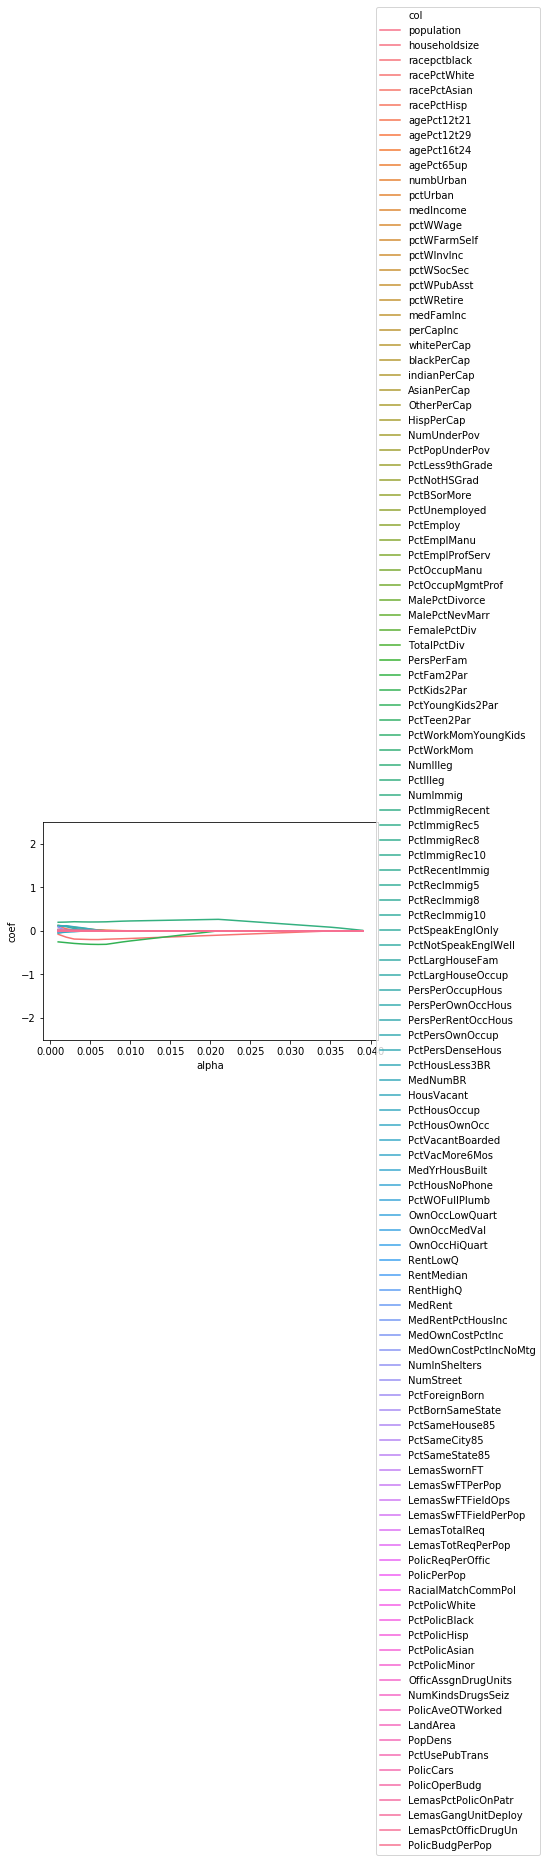

In [173]:
# Plot coefficients at various values of alpha
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = results)
ax.set(ylim = (-2.5, 2.5))
ax.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1)

Note that from an initial field of 122 features, only 3 remain at alpha = 0.02 and all are eliminated by alpha = 0.04. For our purposes, we set alpha = 0.005 in order to examine several of the most important features:

In [174]:
# Set alpha to low value so that some features are retained
alpha = 0.005

# Apply LASSO regression
clf = linear_model.Lasso(alpha = alpha)
clf.fit(crime_data, target_arr)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

We next plot the model coefficients using a barplot to show which features have been retained and which have effectively dropped out of the model:

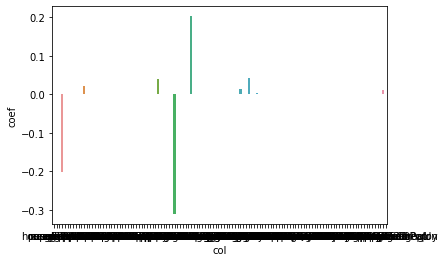

In [144]:
# Display plot of retained coefficients
dd = pd.DataFrame({'col': crime_data.columns, 'coef': clf.coef_})
ax = sns.barplot(x = 'col', y = 'coef', data = dd)

The barplot shows 9 features that were selected via LASSO. Next we get the list of features retained by the model (alpha = 0.005):

In [151]:
# Merge column names and coefficients into single list, taking absolute value of coefficients
retained = list(zip(crime_data.columns[np.where(clf.coef_ != 0)], 
                    map(abs, clf.coef_[np.where(clf.coef_ != 0)])))

# Now sort the list by coefficient absolute value to get the top features
sorted(retained, key=lambda x: x[1], reverse=True)

[('PctKids2Par', 0.3105472743478821),
 ('PctIlleg', 0.2026536438961),
 ('racePctWhite', 0.20092343838985624),
 ('HousVacant', 0.04256871693751991),
 ('MalePctDivorce', 0.04023322637030142),
 ('pctUrban', 0.02131012375119378),
 ('PctPersDenseHous', 0.012699481411152949),
 ('LemasPctOfficDrugUn', 0.010927931622242737),
 ('PctVacantBoarded', 0.003556356541513352)]

So the top 5 features according to LASSO are:
1. PctKids2Par
1. PctIlleg
1. racePctWhite
1. HousVacant
1. MalePctDivorce

Three of these features were also selected by mutual information score: *PctKids2Par*, *PctIlleg*, and *racePctWhite*. One top-5 LASSO feature was selected by backward selection: *MalePctDivorce*. Three top-5 LASSO features were selected by forward selection: *PctKids2Par*, *racePctWhite*, and *HousVacant*. All in all, two features appeared in the top 5 of 3 of the models: *PctKids2Par* and *racePctWhite*.

Now we compare our LASSO model with a non-regularized model that retains all features:

In [175]:
# Create non-regularized model for comparison
lm = linear_model.LinearRegression()
lm.fit(crime_data, target_arr)

# Predictions when using LinearRegression
pred_lm = lm.predict(crime_data)

# Prediction when using LASSO
pred_clf = clf.predict(crime_data)

# Display the correlation matrix
np.corrcoef(pred_lm, pred_clf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([[1.   , 0.947],
       [0.947, 1.   ]])

The results suggest that using a limited set of features has only a minor impact on the predictions and likely generalizes better to other data sets as well.

#### Ridge regression

In ridge regression we penalize the model's parameters using the sum of squared values of the parameters (L2-regularization). Because ridge regression does not perform feature selection, we apply it here merely for comparison with LASSO. We start with the same value of alpha used above for LASSO (0.005):

In [176]:
# Select low value for alpha
alpha = 0.005

# Perform ridge regression
clf = linear_model.Ridge(alpha = alpha)
clf.fit(crime_data, target_arr)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Rather than plot the coefficients (because there are so many), we simply list them:

In [177]:
# Display coefficients
clf.coef_

array([ 0.161, -0.02 ,  0.177, -0.052, -0.03 ,  0.046,  0.111, -0.253,
       -0.129,  0.052, -0.276,  0.047, -0.195, -0.185,  0.046, -0.184,
        0.089,  0.013, -0.095,  0.303,  0.116, -0.364, -0.035, -0.035,
        0.022,  0.043,  0.032,  0.088, -0.18 , -0.112,  0.07 ,  0.056,
        0.006,  0.248, -0.064, -0.02 ,  0.067,  0.109,  0.412,  0.229,
        0.115, -0.492, -0.09 ,  0.036, -0.35 , -0.031, -0.002,  0.063,
       -0.187, -0.133,  0.119, -0.211,  0.023,  0.027, -0.078,  0.048,
       -0.046, -0.16 ,  0.414, -0.204, -0.043, -0.179, -0.027, -0.126,
        0.618, -0.118, -0.239, -0.609,  0.2  ,  0.102,  0.028,  0.144,
       -0.047,  0.478,  0.052, -0.078, -0.016,  0.016, -0.014, -0.301,
        0.229, -0.   , -0.22 , -0.04 , -0.054,  0.361,  0.044, -0.048,
       -0.082,  0.117,  0.163,  0.147,  0.007, -0.026,  0.026,  0.017,
       -0.644, -0.235, -0.483,  0.399, -0.253, -0.001,  0.171,  0.132,
       -0.076, -0.066,  0.126,  0.189,  0.093, -0.211, -0.164, -0.015,
      

It appears that just a single coefficient is zero at alpha = 0.005. Now we plot the values of coefficients at different values of alpha:

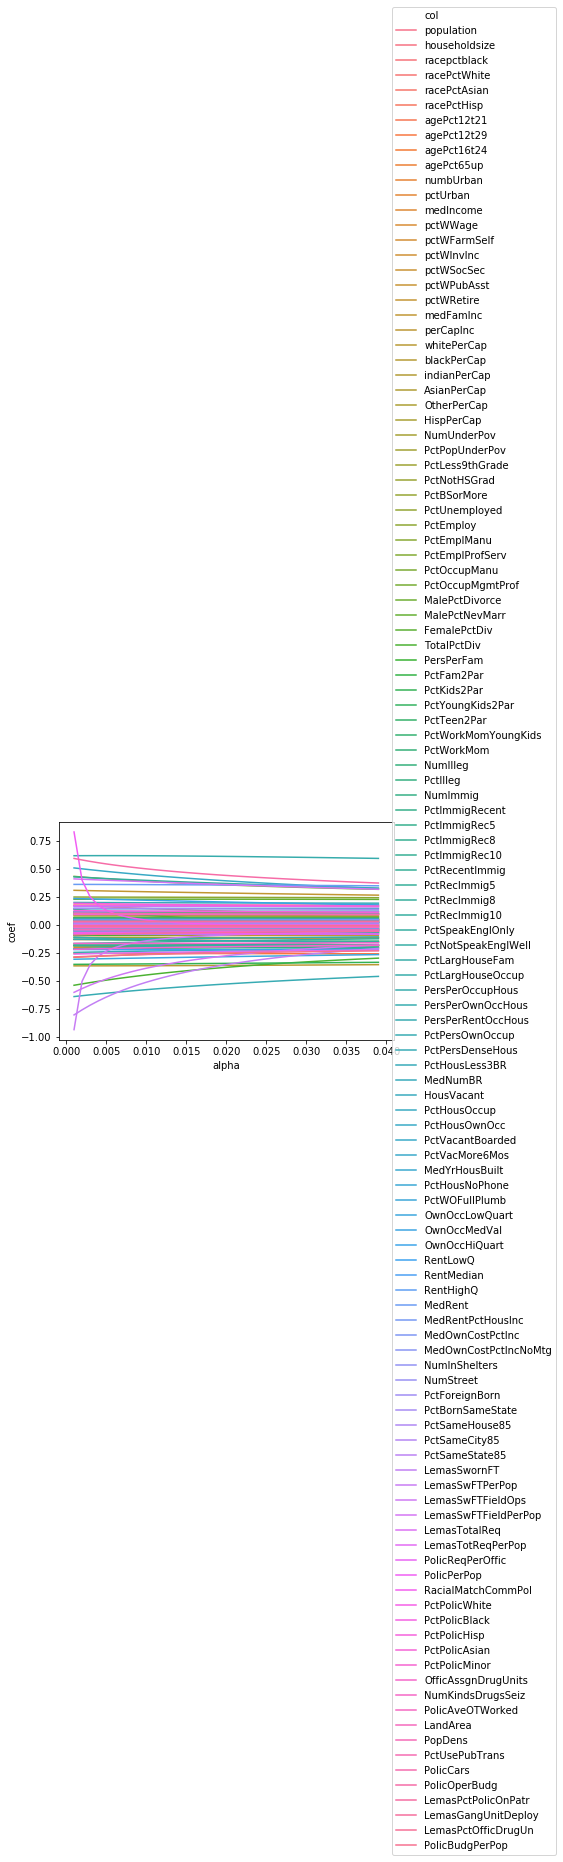

In [179]:
# Compile variables and features at different values of alpha
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])

for alpha in np.arange(0.001, 0.04, .001):
    clf = linear_model.Ridge(alpha = alpha)
    clf.fit(crime_data, target_arr)
    dd = pd.DataFrame({'col': crime_data.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)

# Plot coefficients at different values of alpha
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = results)
ax.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1);

Note that, although the results converge, they do not converge to zero as they do in LASSO.

## 3. Describe your findings
In this assignment we experimented with four different methods of feature selection: *mutual information score*, *backward selection*, *forward selection*, and *LASSO*. We also compared *ridge regression* to *LASSO*.

Of the four methods of features selection we applied, *backward selection* yielded the most distinctive selection of features, with just one feature that was selected by another model (*MalePctDivorce*, also selected by *LASSO*). On the other hand, *LASSO* yielded the most corroborated selection of features, with each of its top 5 features appearing in at least one of the top-5 lists of other selection methods. Both *mutual information* and *forward selection* had three features found in other top-5 lists.

In summary, here are the top 5 features identified by each of the four methods of feature selection applied:

#### *Mutual information score*
1. PctKids2Par
1. PctIlleg
1. PctFam2Par
1. racePctWhite
1. PctYoungKids2Par

#### *Backward selection*
1. numbUrban
1. MalePctDivorce
1. TotalPctDiv
1. LemasSwFTPerPop
1. PolicPerPop

#### *Forward selection*
1. racePctWhite
1. pctUrban
1. PctKids2Par
1. PctWorkMom
1. HousVacant

#### *LASSO*
1. PctKids2Par
1. PctIlleg
1. racePctWhite
1. HousVacant
1. MalePctDivorce

Two of the features appeared in 3 of the top-5 lists: *PctKids2Par* (top item according to both *mutual information* and *LASSO*) and *racePctWhite* (top item according to forward selection). We definitely recommend that these two features appear in our model. As for the remaining features, we might consider *PctIlleg* (*mutual information* and *LASSO*), *MalePctDivorce* (*backward selection* and *LASSO*), *HousVacant* (*forward selection* and *LASSO*), each of which appears in two of the top-5 lists.